In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import matplotlib
%matplotlib inline

In [11]:
# select 70% of dataset as trainning set; the remainning 30% was as test set;
def loadDataSet():
    # df = pd.read_table("/home/galaxy/project/logistic_regression/new/LR_total.txt")
    df = pd.read_table("/home/galaxy/project/logistic_regression/new/LR_total_circRNA.txt2")
    #
    df_pa = df[df['Label'] == 1]
    label_pa = df_pa['Label'].tolist()
    df_pa = df_pa.iloc[:, 1:]
    df_pa = df_pa.fillna(df_pa.mean())
    # 
    df_con = df[df['Label'] == 0]
    label_con = df_con['Label'].tolist()
    df_con = df_con.iloc[:, 1:]
    df_con = df_con.fillna(df_con.mean())
    dataMat = pd.concat([df_pa,df_con])
    print(dataMat.head())
    labelMat = label_pa + label_con
    return dataMat, labelMat

X,Y = loadDataSet()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
names = X_train.columns

     circSTXBP3  circHP1BP3  circKIF5B   circDEK  circEEA1  circRBM39  \
97     0.263550    3.864120   3.459040  1.925086  4.378548   2.080822   
98     2.183650    1.780473   1.295944  1.154183  0.617295   0.124022   
99     0.561029    2.130768   1.357395  1.345125  0.219195   0.309998   
100    0.416430    4.645930   6.283274  0.588606  2.251273   4.322790   
101    2.137960    2.726024   4.131435  0.500931  1.725996   2.701908   

     circPARG  circHNRNPK  circSENP6  circCHD2  
97   0.944605    0.176881   0.142145  1.033608  
98   3.087554    1.135748   1.844997  1.551981  
99   1.587178    0.759774   2.659024  1.723919  
100  1.317816    0.459893   0.624251  1.851981  
101  2.439295    4.388238   0.544897  0.468653  


In [12]:
# Standard scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
# bagging lasso for feture-selection
from collections import Counter

# df_train = pd.DataFrame(X_train)
# df_train.index = Y_train
# df_train.columns = names
df = pd.DataFrame(X)
df.index = Y
df.columns = names
#
count_list = []
for i in range(1000):
#     df_i = df_train.sample(len(df_train), replace=True)
    df_i = df.sample(len(df), replace=True)
#     x_train_i, y_train_i = df_i.values, df_i.index
    x_i, y_i = df_i.values, df_i.index
#     model_lasso_i = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train_i, y_train_i)
    model_lasso_i = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_i, y_i)
    coef_i = model_lasso_i.coef_
    count_list += [names[j] for j in range(len(names)) if coef_i[j] != 0]
count_dict = Counter(count_list)
#for variant, number in count_dict.items():
#    print("%s\t%d" % (variant, number))
df = pd.DataFrame.from_dict(count_dict, orient='index').reset_index()
df = df.rename(columns={'index':'variate', 0:'frequency'})
df['frequency'] = df['frequency'] / 1000
df = df.sort_values(['frequency'], ascending=False)
print(df)
# ax = df.plot.bar(x='variate', y='frequency', rot=90)

      variate  frequency
0  circHP1BP3      0.986
5    circCHD2      0.984
1   circKIF5B      0.952
3    circPARG      0.908
4  circHNRNPK      0.751
2   circRBM39      0.749
9   circSENP6      0.652
7     circDEK      0.592
8    circEEA1      0.487
6  circSTXBP3      0.478


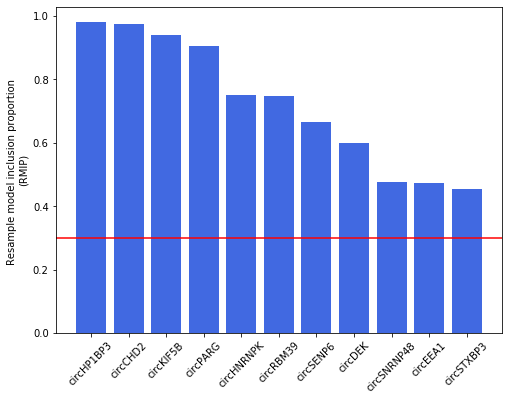

In [10]:
# name_list = ["4.12-3?","4.28-5-2-2","4.28-1-1-2","4.28-4-2-2","1230-2-1-3","4.12-7?","4.12-22?","7.1-1??","4.12-31?","4.12-8?","4.12-1?","3.20-28?"]
# num_list = [0.91,0.74,0.614,0.603,0.386,0.359,0.353,0.334,0.333,0.332,0.329,0.329]

f,ax = plt.subplots(figsize=(8,6))
plt.bar(range(len(df)), df['frequency'], tick_label=df['variate'], color="royalblue")
plt.xticks(rotation=45)
plt.ylabel('Resample model inclusion proportion \n(RMIP)')
plt.axhline(y=0.3, xmin=0, xmax=1, color='red')
plt.show()
#
result_dir = "/home/galaxy/project/logistic_regression/new/"
res = os.path.join(result_dir, "RMIP.pdf")
f.savefig(res, bbox_inches='tight')

In [ ]:
# model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, Y_train)
# # rmse_cv(model_lasso).mean()
# coef = pd.Series(model_lasso.coef_, index = names)
# print(coef)
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
# #画出特征变量的重要程度，这里面选出前10个重要，后10个不重要的举例
# imp_coef = pd.concat([coef.sort_values().head(17)]) # ,coef.sort_values().tail(10)
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

#### select feature based on iteration

In [3]:
#### 
def loadDataSet():
    df = pd.read_table("/home/galaxy/project/logistic_regression/new/LR_total.txt")
    df_pa = df[df['Label'] == 1]
    label_pa = df_pa['Label'].tolist()
    df_pa = df_pa.iloc[:, 1:-1]
    df_pa = df_pa.fillna(df_pa.mean())
    # 
    df_con = df[df['Label'] == 0]
    label_con = df_con['Label'].tolist()
    df_con = df_con.iloc[:, 1:-1]
    df_con = df_con.fillna(df_con.mean())
    dataMat = pd.concat([df_pa,df_con])
    labelMat = label_pa + label_con
    return dataMat, labelMat

X,Y = loadDataSet()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) # 7:3

In [5]:
from itertools import combinations

col_list = X_train.columns
# for i in range(2, len(col_list)+1):
output = sum([list(map(list, combinations(col_list, i))) for i in range(3, len(col_list) + 1)], []) # at least 4
for x in output:
    selected_circ = x
    X_train_circ, X_test_circ = X_train[selected_circ], X_test[selected_circ]
    circ_names = list(X_train_circ.columns)
    print(circ_names)
    # ####
    # train_list = [X_train_circ[x] for x in circ_names] + [X_train_circ]   ###
    #####
    classfier = LogisticRegression()
    sc = StandardScaler()
    i_train = sc.fit_transform(X_train_circ)
    i_test = sc.fit_transform(X_test_circ)
    classfier.fit(i_train, Y_train) ###
    ## 
    y_score = classfier.predict_proba(i_train)[:,1]
    fpr,tpr,threshold = metrics.roc_curve(Y_train, y_score) ###
    roc_auc_train = metrics.auc(fpr,tpr)
    ##
    y_score = classfier.predict_proba(i_test)[:,1]
    fpr,tpr,threshold = metrics.roc_curve(Y_test, y_score) ###
    roc_auc_test = metrics.auc(fpr,tpr)
    print(roc_auc_train, roc_auc_test)
    #
    X_transform = sc.fit_transform(X[selected_circ])  # 
    Y_pred = classfier.predict(X_transform)
    #
    tp = len([i for i in range(len(Y)) if (Y[i] == 1) and (Y_pred[i] == 1)])
    fn = len([i for i in range(len(Y)) if (Y[i] == 1) and (Y_pred[i] == 0)])
    tn = len([i for i in range(len(Y)) if (Y[i] == 0) and (Y_pred[i] == 0)])
    fp = len([i for i in range(len(Y)) if (Y[i] == 0) and (Y_pred[i] == 1)])
    # print(tp, fn, tn, fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    print(sensitivity, specificity, accuracy)

In [8]:
### format file
os.chdir("/home/galaxy/project/logistic_regression/new")
with open("combination.txt", 'r') as f:
    with open("selected.txt", 'w') as fw:
        t = f.readlines()
        for i in range(0, len(t), 3):
            a = t[i]
            b = (t[i+1])
            c = (t[i+2])
            b1 = float(b.split()[0])
            b2 = float(b.split()[1])
            if ("ultrasound（PA）" in a) and ("Cesarean" in a):
                if (b1 > 0.82) and (b2 <= b1) and (float(c.split()[0].strip()) > 0.85):
                    fw.write(a)
                    fw.write(b)
                    fw.write(c)

In [26]:
### select circRNA
from itertools import combinations

col_list = X_train.columns
col_list = [x for x in col_list if "circ" in x]
output = sum([list(map(list, combinations(col_list, i))) for i in range(2, len(col_list) + 1)], []) # at least 2
for x in output:
    selected_circ = x
#     selected_circ = ['circSTXBP3', 'circEEA1', 'circPARG', 'circDEK', 'circSENP6', 'circCHD2', 'circPSMD1']
    X_train_circ, X_test_circ = X_train[selected_circ], X_test[selected_circ]
    #####
    classfier = LogisticRegression()
    sc = StandardScaler()
    i_train = sc.fit_transform(X_train_circ)
    i_test = sc.fit_transform(X_test_circ)
    classfier.fit(i_train, Y_train) ###
    ## 
    y_score = classfier.predict_proba(i_train)[:,1]
    fpr,tpr,threshold = metrics.roc_curve(Y_train, y_score) ###
    roc_auc_train = metrics.auc(fpr,tpr)
    if roc_auc_train > 0.79:
        print(x)
        print(roc_auc_train)
#     print(roc_auc_train)
#     break
    ##
#     y_score = classfier.predict_proba(i_test)[:,1]
#     fpr,tpr,threshold = metrics.roc_curve(Y_test, y_score) ###
#     roc_auc_test = metrics.auc(fpr,tpr)
#     print(roc_auc_train, roc_auc_test)
#     #
#     X_transform = sc.fit_transform(X[selected_circ])  # 
#     Y_pred = classfier.predict(X_transform)
#     #
#     tp = len([i for i in range(len(Y)) if (Y[i] == 1) and (Y_pred[i] == 1)])
#     fn = len([i for i in range(len(Y)) if (Y[i] == 1) and (Y_pred[i] == 0)])
#     tn = len([i for i in range(len(Y)) if (Y[i] == 0) and (Y_pred[i] == 0)])
#     fp = len([i for i in range(len(Y)) if (Y[i] == 0) and (Y_pred[i] == 1)])
#     # print(tp, fn, tn, fp)
#     sensitivity = tp / (tp + fn)
#     specificity = tn / (tn + fp)
#     accuracy = (tp+tn)/(tp+fn+fp+tn)
#     print(sensitivity, specificity, accuracy)